In [1]:
!pip install pandas
!pip install matplotlib
!pip install scikit-learn
!pip install numpy

!pip install seaborn


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import numpy as np

In [3]:
week_days_path = "./paris_weekdays.csv"
week_ends_path = "./paris_weekends.csv"

paris_weekdays = pd.read_csv(week_days_path, index_col=0)
paris_weekends = pd.read_csv(week_ends_path, index_col=0)


In [4]:
print(paris_weekdays.head())

      realSum        room_type  room_shared  room_private  person_capacity  \
0  296.159940     Private room        False          True              2.0   
1  288.237487     Private room        False          True              2.0   
2  211.343089     Private room        False          True              2.0   
3  298.956100  Entire home/apt        False         False              2.0   
4  247.926181  Entire home/apt        False         False              4.0   

   host_is_superhost  multi  biz  cleanliness_rating  \
0               True      0    0                10.0   
1               True      0    0                10.0   
2              False      0    0                10.0   
3              False      0    1                 9.0   
4              False      0    0                 7.0   

   guest_satisfaction_overall  bedrooms      dist  metro_dist  attr_index  \
0                        97.0         1  0.699821    0.193709  518.478947   
1                        97.0         1 

In [5]:
paris_weekdays.shape

(3130, 19)

# Missing values

In [6]:
print(paris_weekdays.isnull().sum())

realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
dtype: int64


In [7]:
print(paris_weekends.isnull().sum())

realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
dtype: int64


No missing values??? :)

# Standaryzacja

In [20]:
selected_columns = [
    'guest_satisfaction_overall',
    'dist',
    'realSum'
]

Weekdays (po standaryzacji):
       guest_satisfaction_overall          dist       realSum
count                3.130000e+03  3.130000e+03  3.130000e+03
mean                -6.310891e-16  3.632167e-17 -6.356293e-17
std                  1.000160e+00  1.000160e+00  1.000160e+00
min                 -7.987717e+00 -1.997843e+00 -7.722528e-01
25%                 -3.169940e-01 -7.942493e-01 -4.006588e-01
50%                  2.388555e-01  4.527798e-03 -2.025145e-01
75%                  6.835351e-01  7.141756e-01  1.631998e-01
max                  9.058749e-01  3.189730e+00  4.049114e+01

Weekends (po standaryzacji):
       guest_satisfaction_overall         dist      realSum
count                 3558.000000  3558.000000  3558.000000
mean                     0.038887    -0.019212    -0.029669
std                      0.962299     0.990047     0.656250
min                     -7.987717    -1.997828    -0.765785
25%                     -0.316994    -0.810231    -0.398160
50%                    

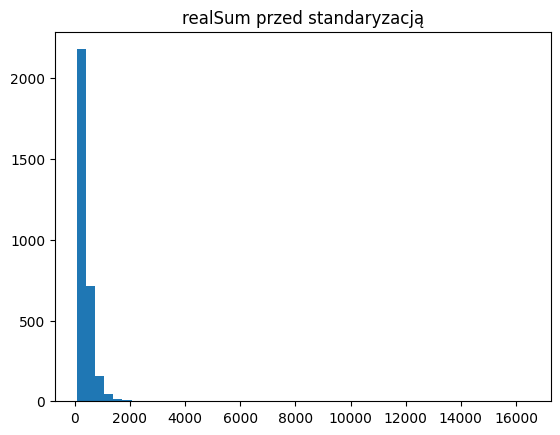

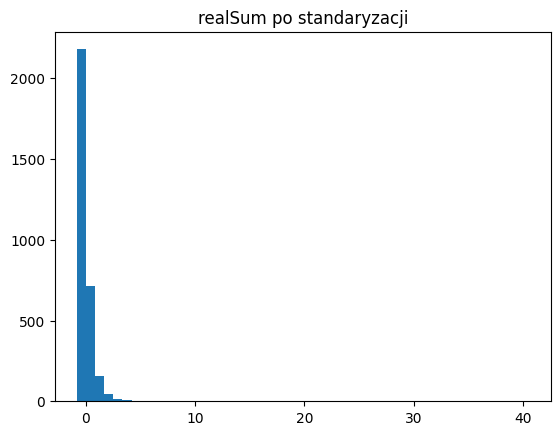

In [21]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt



# Ten sam scaler dla weekdays i weekends

scaler = StandardScaler()
scaler.fit(paris_weekdays[selected_columns])

paris_weekdays_std = paris_weekdays.copy()
paris_weekdays_std[selected_columns] = scaler.transform(
    paris_weekdays[selected_columns]
)

paris_weekends_std = paris_weekends.copy()
paris_weekends_std[selected_columns] = scaler.transform(
    paris_weekends[selected_columns]
)

print("Weekdays (po standaryzacji):")
print(paris_weekdays_std[selected_columns].describe())

print("\nWeekends (po standaryzacji):")
print(paris_weekends_std[selected_columns].describe())

plt.hist(paris_weekdays['realSum'], bins=50)
plt.title("realSum przed standaryzacją")
plt.show()

plt.hist(paris_weekdays_std['realSum'], bins=50)
plt.title("realSum po standaryzacji")
plt.show()

# Korelacja

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def analyze_correlations_with_outlier_filter(df, dataset_name, selected_columns):
    target = 'realSum'
    variables = [c for c in selected_columns if c != target]

    print(f"\nCorrelation Analysis: {dataset_name}")

    correlations = {}
    for var in variables:
        corr = df[target].corr(df[var])
        correlations[var] = corr
        print(f"{target} vs {var:30} : {corr:+.4f}")

    # --- filtracja outlierów (top 5%) ---
    realSum_threshold = df[target].quantile(0.95)
    df_filtered_all = df[df[target] <= realSum_threshold].copy()

    fig, axes = plt.subplots(1, len(variables), figsize=(7 * len(variables), 5))
    if len(variables) == 1:
        axes = [axes]

    for idx, var in enumerate(variables):
        ax = axes[idx]

        var_threshold = df_filtered_all[var].quantile(0.95)
        df_filtered = df_filtered_all[df_filtered_all[var] <= var_threshold].copy()

        sns.scatterplot(
            data=df_filtered,
            x=var,
            y=target,
            alpha=0.6,
            s=40,
            ax=ax
        )

        ax.set_xlabel(var, fontsize=11, fontweight='bold')
        ax.set_ylabel(target, fontsize=11, fontweight='bold')

        corr_val = correlations[var]
        ax.text(
            0.05, 0.95,
            f'r = {corr_val:+.3f}',
            transform=ax.transAxes,
            fontsize=12,
            fontweight='bold',
            verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.9)
        )

        ax.grid(True, alpha=0.3, linestyle='--')

    plt.suptitle(
        f'Correlation Analysis: {dataset_name}\n'
        f'(Filtered: top 5% outliers removed)',
        fontsize=15,
        fontweight='bold',
        y=1.05
    )
    plt.tight_layout()
    plt.show()

    print(f"\nSummary for {dataset_name}:")
    for var, corr in correlations.items():
        strength = (
            "strong" if abs(corr) > 0.5 else
            "moderate" if abs(corr) > 0.3 else
            "weak"
        )
        direction = "positive" if corr > 0 else "negative"
        print(f"  - {var:30}: {strength} {direction} correlation ({corr:+.3f})")

    return correlations


Correlation Analysis: Paris Weekdays
realSum vs guest_satisfaction_overall     : +0.0503
realSum vs dist                           : -0.0734


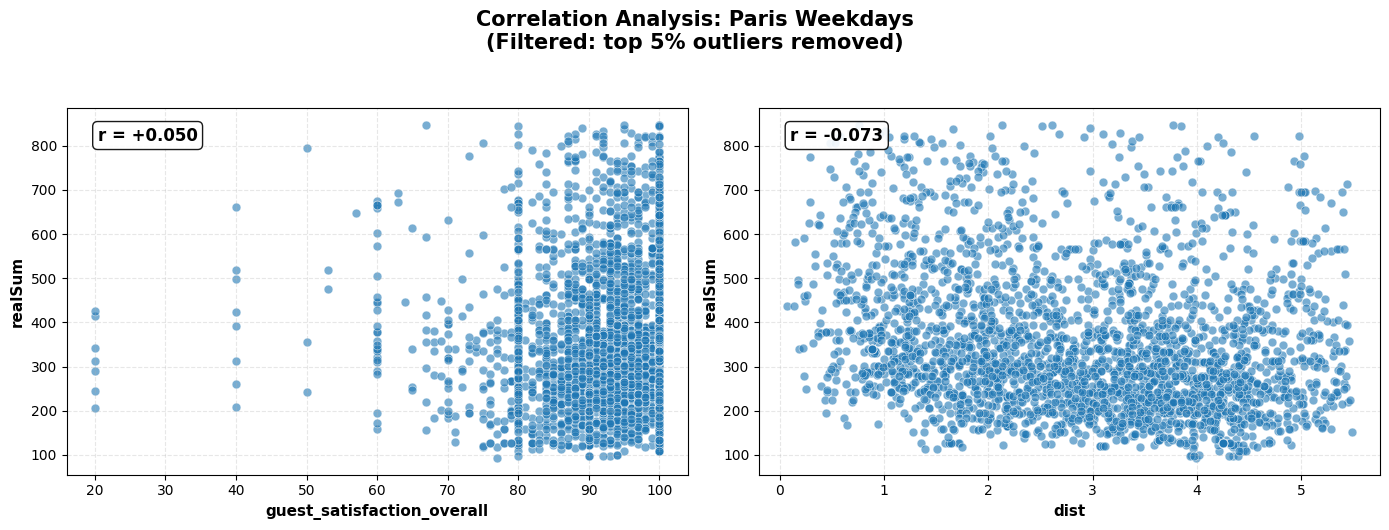


Summary for Paris Weekdays:
  - guest_satisfaction_overall    : weak positive correlation (+0.050)
  - dist                          : weak negative correlation (-0.073)

Correlation Analysis: Paris Weekends
realSum vs guest_satisfaction_overall     : +0.0734
realSum vs dist                           : -0.1399


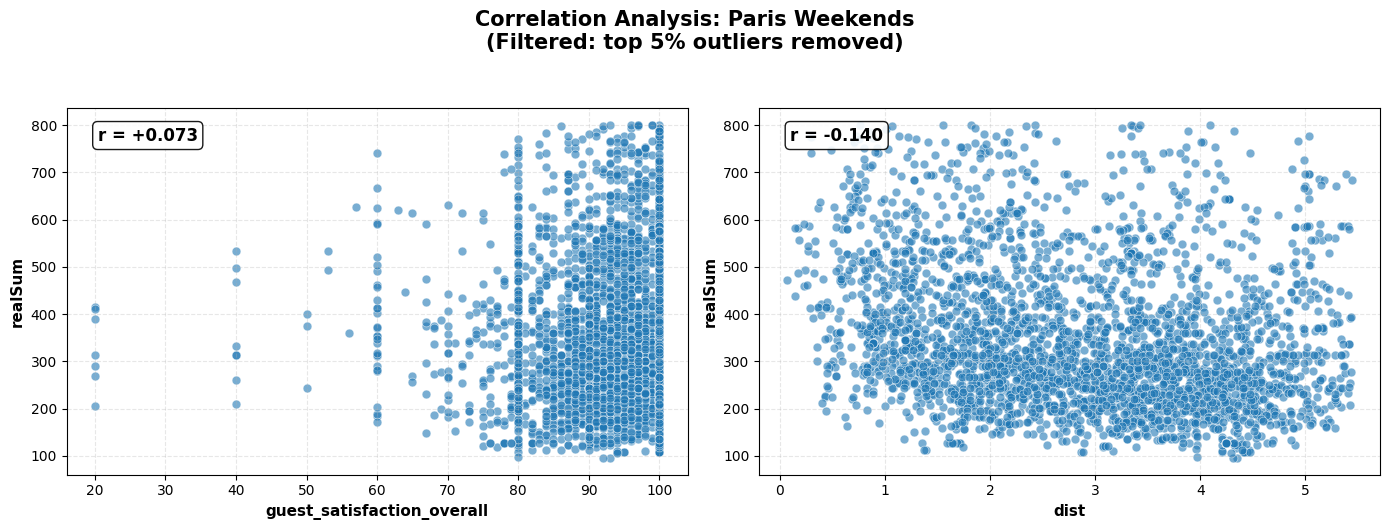


Summary for Paris Weekends:
  - guest_satisfaction_overall    : weak positive correlation (+0.073)
  - dist                          : weak negative correlation (-0.140)


In [25]:
weekday_corrs = analyze_correlations_with_outlier_filter(
    paris_weekdays,
    "Paris Weekdays",
    selected_columns
)

weekend_corrs = analyze_correlations_with_outlier_filter(
    paris_weekends,
    "Paris Weekends",
    selected_columns
)

In [26]:
print("\nCORRELATION COMPARISON: Weekend vs Weekday")

variables = [c for c in selected_columns if c != 'realSum']
comparison_data = []

for var in variables:
    weekend_corr = weekend_corrs[var]
    weekday_corr = weekday_corrs[var]
    diff = weekend_corr - weekday_corr
    comparison_data.append([var, weekend_corr, weekday_corr, diff])

comparison_df = pd.DataFrame(
    comparison_data,
    columns=['Variable', 'Weekend_Corr', 'Weekday_Corr', 'Difference']
)

print(comparison_df.to_string(
    index=False,
    float_format=lambda x: f"{x:+.4f}"
))


CORRELATION COMPARISON: Weekend vs Weekday
                  Variable  Weekend_Corr  Weekday_Corr  Difference
guest_satisfaction_overall       +0.0734       +0.0503     +0.0230
                      dist       -0.1399       -0.0734     -0.0665


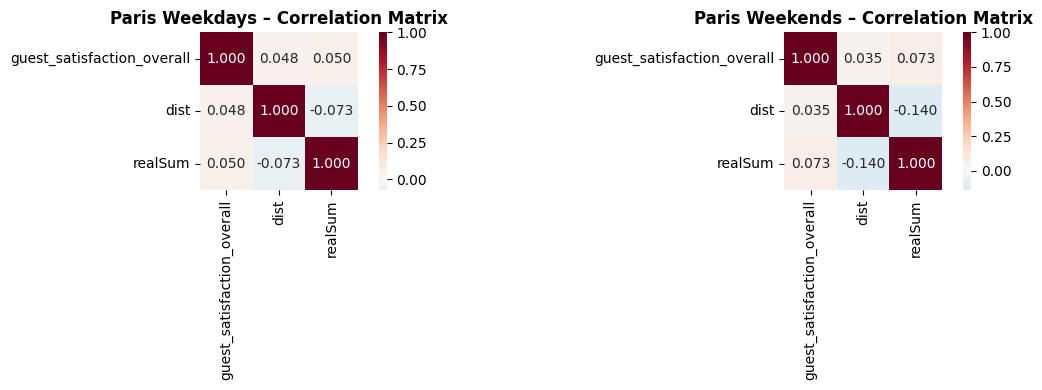

In [27]:
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

weekday_matrix = paris_weekdays[selected_columns].corr()
weekend_matrix = paris_weekends[selected_columns].corr()

sns.heatmap(
    weekday_matrix,
    annot=True,
    fmt='.3f',
    cmap='RdBu_r',
    center=0,
    square=True,
    ax=ax1
)
ax1.set_title('Paris Weekdays – Correlation Matrix', fontweight='bold')

sns.heatmap(
    weekend_matrix,
    annot=True,
    fmt='.3f',
    cmap='RdBu_r',
    center=0,
    square=True,
    ax=ax2
)
ax2.set_title('Paris Weekends – Correlation Matrix', fontweight='bold')

plt.tight_layout()
plt.show()

# Estymator jadrowy

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import math

def K(x):
    return 1 / (math.sqrt(2 * math.pi)) * np.exp(-0.5 * x**2)

def kde(x_all, x, h):
    m = len(x_all)
    sum_k = sum(K((x - xi) / h) for xi in x_all)
    return sum_k / (m * h)

In [29]:
def plot_kde_with_bandwidths(data, h_values, title):
    x_min, x_max = data.min() - 5, data.max() + 5
    x_plot = np.linspace(x_min, x_max, 1000)
    
    plt.figure(figsize=(10,6))
    
    for h in h_values:
        y_plot = [kde(data, xi, h) for xi in x_plot]
        plt.plot(x_plot, y_plot, label=f'h = {h}')
    
    # Punkty danych
    plt.scatter(data, np.zeros_like(data), color='red', alpha=0.3, marker='|')
    
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel('realSum')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.show()

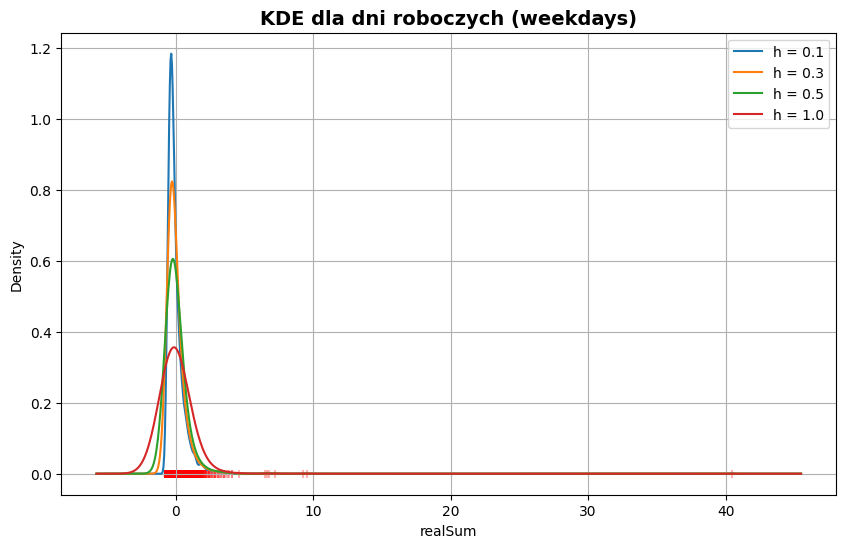

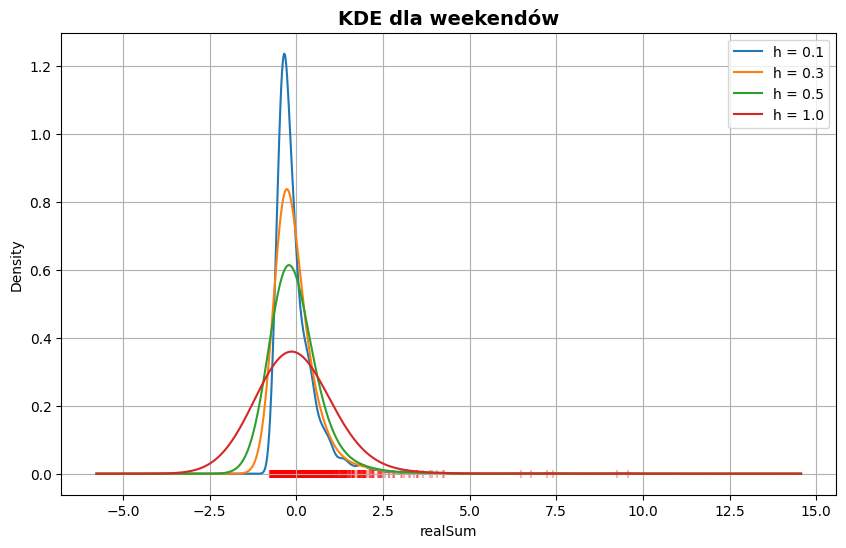

In [30]:
h_values = [0.1, 0.3, 0.5, 1.0]

selected_data_weekdays = paris_weekdays_std['realSum'].values
plot_kde_with_bandwidths(selected_data_weekdays, h_values, "KDE dla dni roboczych (weekdays)")

selected_data_weekends = paris_weekends_std['realSum'].values
plot_kde_with_bandwidths(selected_data_weekends, h_values, "KDE dla weekendów")

# Outlier analysis

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
from numpy.linalg import inv

def get_outlier_rows(df, col, z_thresh=3):
    """
    Wykrywa outliery w jednej kolumnie na podstawie z-score (domyślnie >3 lub <-3)
    """
    mean = df[col].mean()
    std = df[col].std()
    z_scores = (df[col] - mean) / std
    return df[np.abs(z_scores) > z_thresh]

def plot_distribution_with_outliers(df, col):
    plt.figure(figsize=(8,4))
    plt.hist(df[col], bins=50, alpha=0.7, color='steelblue')
    outliers = get_outlier_rows(df, col)
    if len(outliers) > 0:
        plt.scatter(outliers[col], [0]*len(outliers), color='red', label='Outliers', zorder=10)
    plt.title(f'Distribution with Outliers: {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    return df[col].describe()


=== Weekends Outlier Analysis ===

Analyzing column: realSum
Found 58 outlier rows
         realSum  rest_index_norm  attr_index_norm
78   1187.435921        46.288281        17.787645
87   1274.349893        58.202114        30.264666
95   1169.959922        52.728603        19.027262
97   1193.261255        61.458788        32.218235
116  1170.192935        63.365555        32.644091


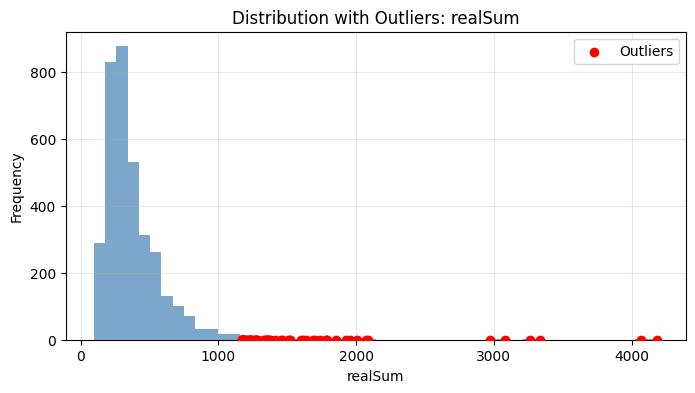


Analyzing column: rest_index_norm
Found 4 outlier rows
         realSum  rest_index_norm  attr_index_norm
712   776.633423        80.526294        39.664704
1129  950.461366        78.512654        34.722161
1143  324.587566       100.000000        29.610499
1729  753.332091        91.318797        16.830509


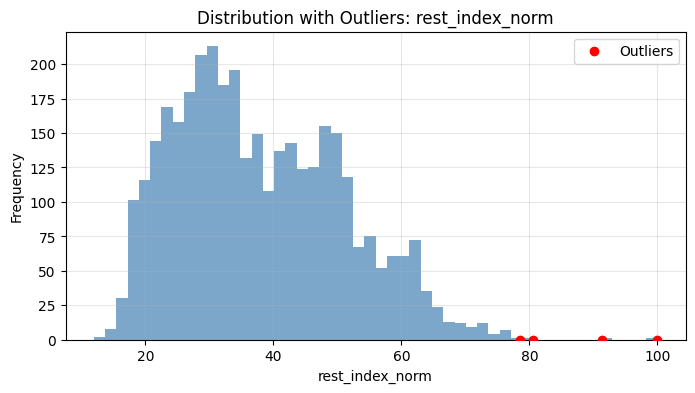


Analyzing column: attr_index_norm
Found 30 outlier rows
       realSum  rest_index_norm  attr_index_norm
4   266.334234        62.189313        49.279502
8   527.076149        50.555039        47.044137
66  596.514121        48.509248        67.927461
80  298.723087        58.953898        42.596966
92  706.729425        53.669390        41.709569


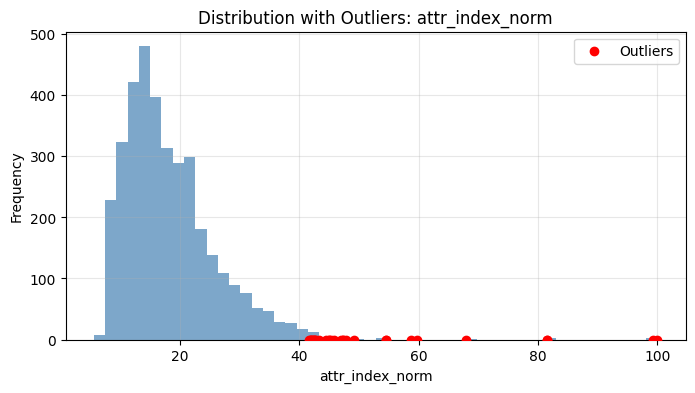


=== Weekdays Outlier Analysis ===

Analyzing column: realSum
Found 22 outlier rows
         realSum  rest_index_norm  attr_index_norm
231  3081.834281        76.431624        41.154499
299  1660.452978        76.520334        25.827678
395  1778.124709        57.450594        25.057949
414  1894.398360        71.388826        22.956361
420  1778.124709        67.141072        27.339201


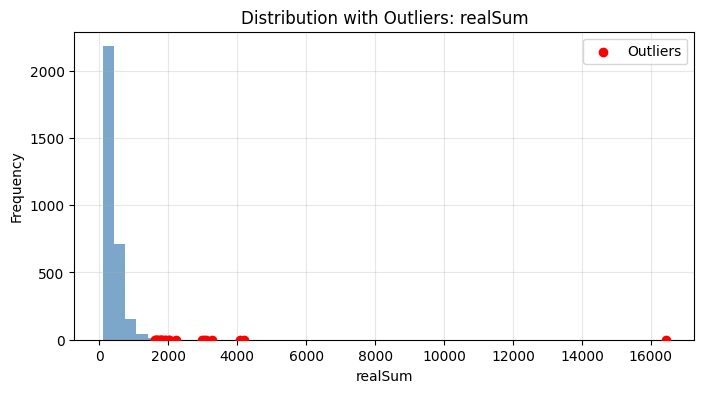


Analyzing column: rest_index_norm
Found 2 outlier rows
         realSum  rest_index_norm  attr_index_norm
1016  950.461366       100.000000        34.761248
1518  753.332091        99.190762        16.849654


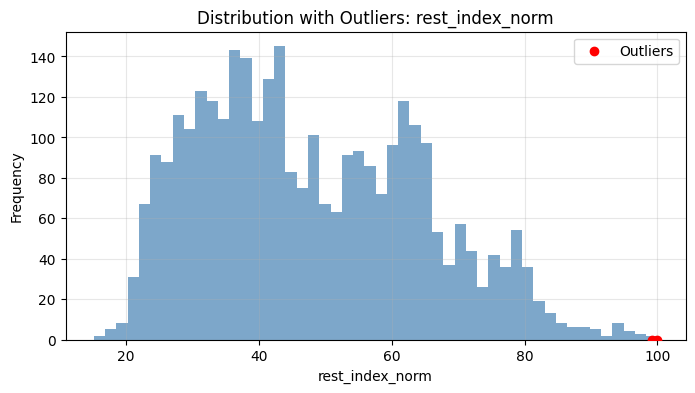


Analyzing column: attr_index_norm
Found 27 outlier rows
         realSum  rest_index_norm  attr_index_norm
1     288.237487        58.791463        42.507907
5     527.076149        64.392839        47.096508
66    577.873054        61.787279        68.007435
115   347.422873        58.958427       100.000000
142  1362.428931        73.732166        81.545099


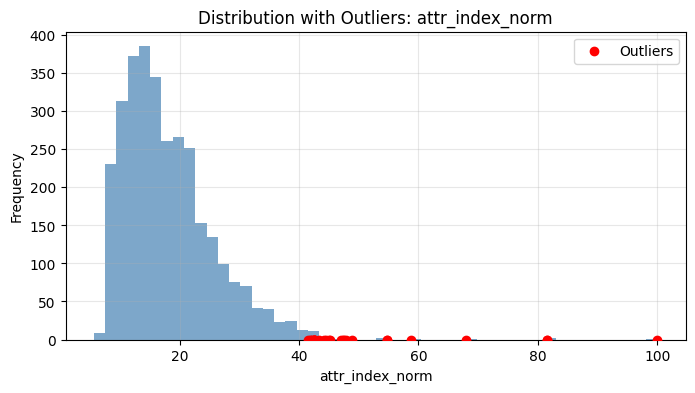

In [32]:
selected_columns = ['realSum', 'rest_index_norm', 'attr_index_norm']

# Weekends
print("\n=== Weekends Outlier Analysis ===")
for col in selected_columns:
    print(f"\n{'='*40}\nAnalyzing column: {col}\n{'='*40}")
    outliers = get_outlier_rows(paris_weekends, col)
    print(f"Found {len(outliers)} outlier rows")
    if len(outliers) > 0:
        print(outliers[selected_columns].head())
    plot_distribution_with_outliers(paris_weekends, col)

# Weekdays
print("\n=== Weekdays Outlier Analysis ===")
for col in selected_columns:
    print(f"\n{'='*40}\nAnalyzing column: {col}\n{'='*40}")
    outliers = get_outlier_rows(paris_weekdays, col)
    print(f"Found {len(outliers)} outlier rows")
    if len(outliers) > 0:
        print(outliers[selected_columns].head())
    plot_distribution_with_outliers(paris_weekdays, col)

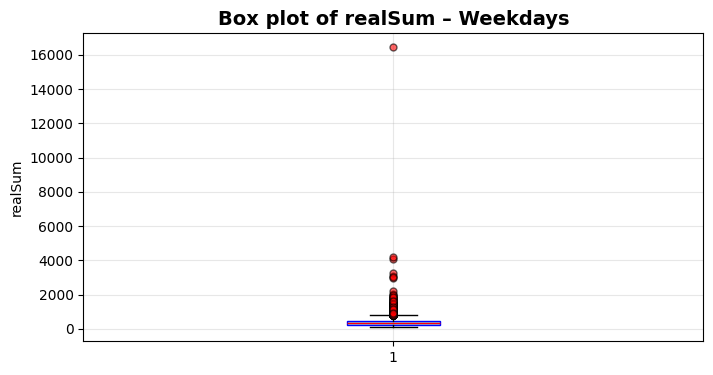

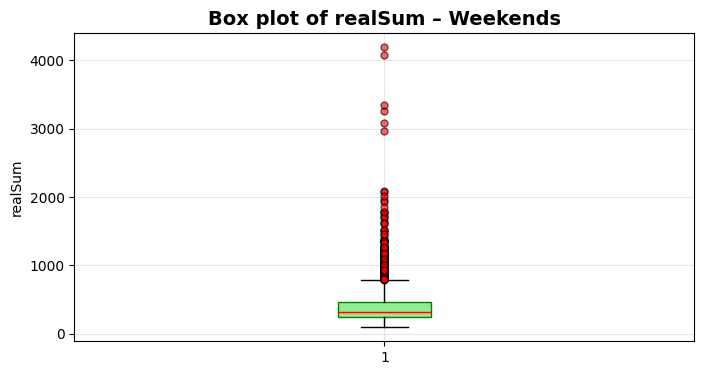

In [35]:
import matplotlib.pyplot as plt

# Boxplot dla weekdays
plt.figure(figsize=(8,4))
plt.boxplot(paris_weekdays['realSum'], vert=True, patch_artist=True,
            boxprops=dict(facecolor='skyblue', color='blue'),
            medianprops=dict(color='red'),
            flierprops=dict(marker='o', markerfacecolor='red', markersize=5, alpha=0.6))
plt.title('Box plot of realSum – Weekdays', fontsize=14, fontweight='bold')
plt.ylabel('realSum')
plt.grid(True, alpha=0.3)
plt.show()

# Boxplot dla weekends
plt.figure(figsize=(8,4))
plt.boxplot(paris_weekends['realSum'], vert=True, patch_artist=True,
            boxprops=dict(facecolor='lightgreen', color='green'),
            medianprops=dict(color='red'),
            flierprops=dict(marker='o', markerfacecolor='red', markersize=5, alpha=0.6))
plt.title('Box plot of realSum – Weekends', fontsize=14, fontweight='bold')
plt.ylabel('realSum')
plt.grid(True, alpha=0.3)
plt.show()

In [36]:
def mahalanobis_outliers(df, cols, threshold=0.99):
    data = df[cols].values
    mean = np.mean(data, axis=0)
    cov = np.cov(data, rowvar=False)
    inv_covmat = inv(cov)
    diff = data - mean
    m_dist = np.sqrt(np.sum(diff @ inv_covmat * diff, axis=1))
    
    critical_value = np.sqrt(chi2.ppf(threshold, df=len(cols)))
    outlier_mask = m_dist > critical_value
    return df[outlier_mask], m_dist


Multivariate Outlier Analysis: realSum vs rest_index_norm
Number of outliers: 101 / 6688 (1.51%)


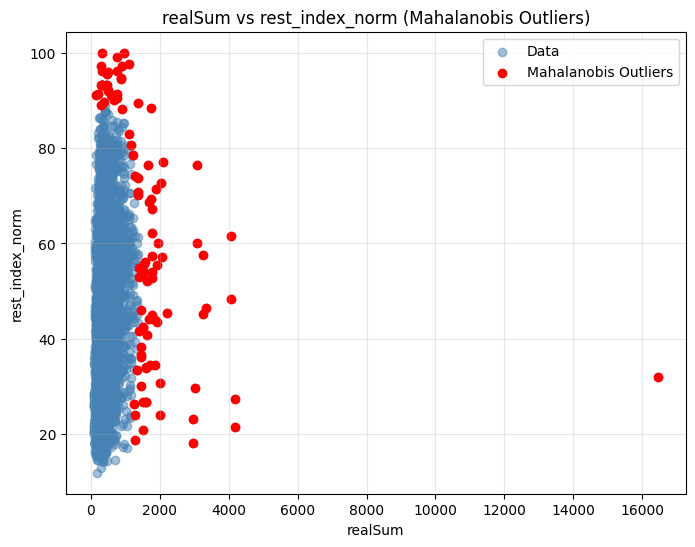


Multivariate Outlier Analysis: realSum vs attr_index_norm
Number of outliers: 139 / 6688 (2.08%)


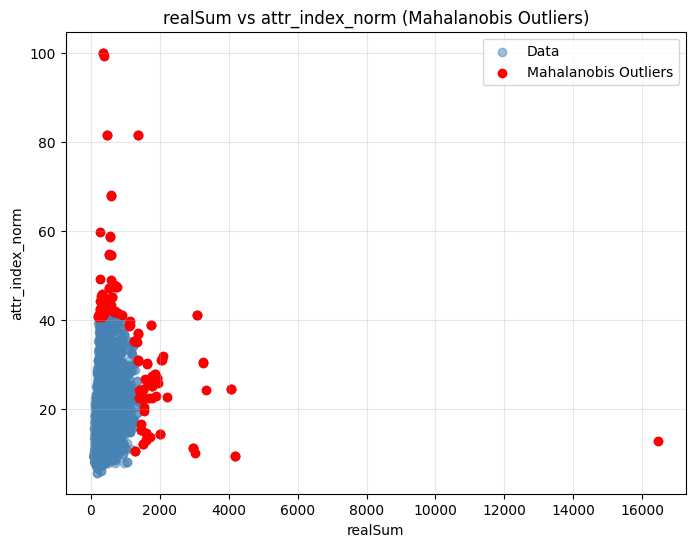

In [37]:
pairs = [
    ('realSum', 'rest_index_norm'),
    ('realSum', 'attr_index_norm')
]

paris_weekdays['is_weekend'] = 0
paris_weekends['is_weekend'] = 1
paris_all = pd.concat([paris_weekdays, paris_weekends], ignore_index=True)

for x_var, y_var in pairs:
    print(f"\n{'='*60}")
    print(f"Multivariate Outlier Analysis: {x_var} vs {y_var}")
    print(f"{'='*60}")
    
    outliers, m_dist = mahalanobis_outliers(paris_all, [x_var, y_var], threshold=0.99)
    print(f"Number of outliers: {len(outliers)} / {len(paris_all)} ({len(outliers)/len(paris_all)*100:.2f}%)")
    
    plt.figure(figsize=(8,6))
    plt.scatter(paris_all[x_var], paris_all[y_var], c='steelblue', alpha=0.5, label='Data')
    plt.scatter(outliers[x_var], outliers[y_var], c='red', label='Mahalanobis Outliers')
    plt.xlabel(x_var)
    plt.ylabel(y_var)
    plt.title(f"{x_var} vs {y_var} (Mahalanobis Outliers)")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()